In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
data = pd.read_csv('heart_disease_diag.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


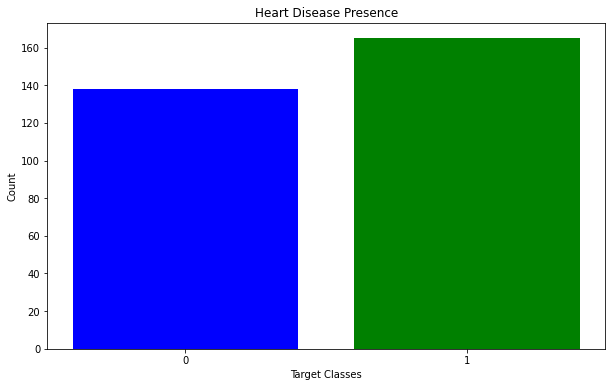

In [3]:
plt.figure(figsize=(10,6))
plt.title("Heart Disease Presence")
plt.xticks([0,1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.bar(data['target'].unique(), data['target'].value_counts(), color=['green', 'blue'])
plt.show()

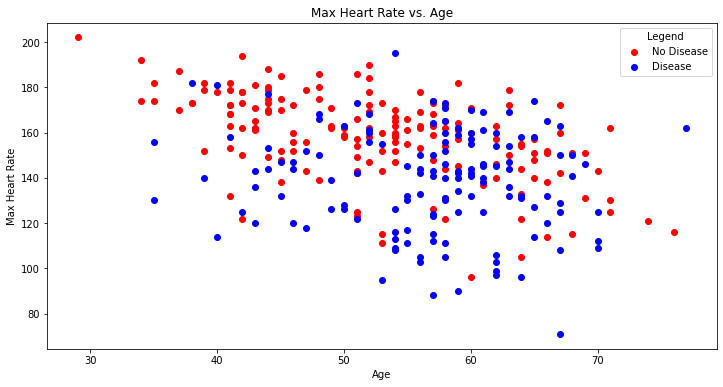

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(data.age[data.target==1], data.thalach[data.target==1], c='red', label="Disease")
plt.scatter(data.age[data.target==0], data.thalach[data.target==0], c='blue', label="No Disease")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend({'Disease', 'No Disease'}, title='Legend')
plt.title('Max Heart Rate vs. Age')
plt.show()

In [5]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
from sklearn.preprocessing import StandardScaler 
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [6]:
y = data['target']
X = data.drop('target', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)
X_train.shape

(203, 30)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_values = []
for i in range (1, 203) :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_values.append(knn.score(X_test, y_test))    

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

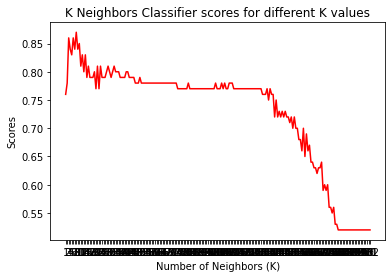

In [8]:
plt.plot([k for k in range(1, 203)], knn_values, color = 'red')
plt.xticks([i for i in range(1, 203)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
scaler = MinMaxScaler()
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model = svm.SVC(kernel='linear', C=1000, gamma=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
conf = confusion_matrix(y_pred, y_test)
print(acc)
print(conf)
print(classification_report(y_pred, y_test))

0.8351648351648352
[[35  6]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

